In [1]:
%reset -f

In [2]:
%connect_info

{
  "shell_port": 54097,
  "iopub_port": 56467,
  "stdin_port": 55657,
  "control_port": 49475,
  "hb_port": 53943,
  "ip": "127.0.0.1",
  "key": "e125fa5a-13d3503b55e8269bd8008a4e",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-4862fae7-0547-4006-b8fd-47b3cf03e4e1.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import itertools

In [4]:
path_base = "/home/trix_arch/IIVspace/DataSc/"+\
            "DataCamp2021/DSR_B28_work/DSR28_portfolio_project/"+\
            "Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
path_add = "df_data/"
filename_to_load = "xdf_20211218_cle_noCnoA_no3.csv"


Xdf = pd.read_csv(path_base + path_add + filename_to_load, 
                 dtype={'time_ms': np.int64,
                        'B102NO2': np.float32,
                        'B302C2H5OH': np.float32,
                        'B502VOC': np.float32,
                        'B702CO': np.float32,
                        'TdegC': np.float32,
                        'RH': np.float32,
                        'label': 'str',
                        'add_label': 'str',
                        'condition': 'str'
                       })

In [5]:
Xdf

,time_ms,B102NO2,B302C2H5OH,B502VOC,B702CO,TdegC,RH,label,add_label,condition
0,68,92.0,52.0,200.0,244.0,23.0,52.0,beer,1pilsner,roomjose
1,70,91.0,53.0,199.0,242.0,23.0,52.0,beer,1pilsner,roomjose
2,1561,90.0,51.0,197.0,218.0,23.0,52.0,beer,1pilsner,roomjose
3,1790,90.0,52.0,198.0,215.0,23.0,52.0,beer,1pilsner,roomjose
4,2025,90.0,52.0,198.0,213.0,23.0,52.0,beer,1pilsner,roomjose
...,...,...,...,...,...,...,...,...,...,...
20534,138730,70.0,30.0,111.0,103.0,23.0,49.0,tomato,1,roomlecture
20535,138963,70.0,31.0,111.0,104.0,23.0,49.0,tomato,1,roomlecture
20536,139197,70.0,31.0,111.0,104.0,23.0,49.0,tomato,1,roomlecture
20537,139426,70.0,31.0,111.0,104.0,23.0,49.0,tomato,1,roomlecture


In [6]:
Xdf.label.unique().tolist()

['beer',
 'bread',
 'carrot',
 'cheese',
 'coffee',
 'cola',
 'cucumber',
 'gluehwein',
 'lemon',
 'orange',
 'sprite',
 'tomato']

In [7]:
Xdf["label_label"] = Xdf[["label","add_label"]]\
                        .agg("_".join, axis=1)\
                        .replace("[0-9]", "", regex=True)

In [8]:
Xdf.sample()

,time_ms,B102NO2,B302C2H5OH,B502VOC,B702CO,TdegC,RH,label,add_label,condition,label_label
7069,43890,164.0,47.0,90.0,89.0,22.0,51.0,coffee,1graycup,roomjose,coffee_graycup


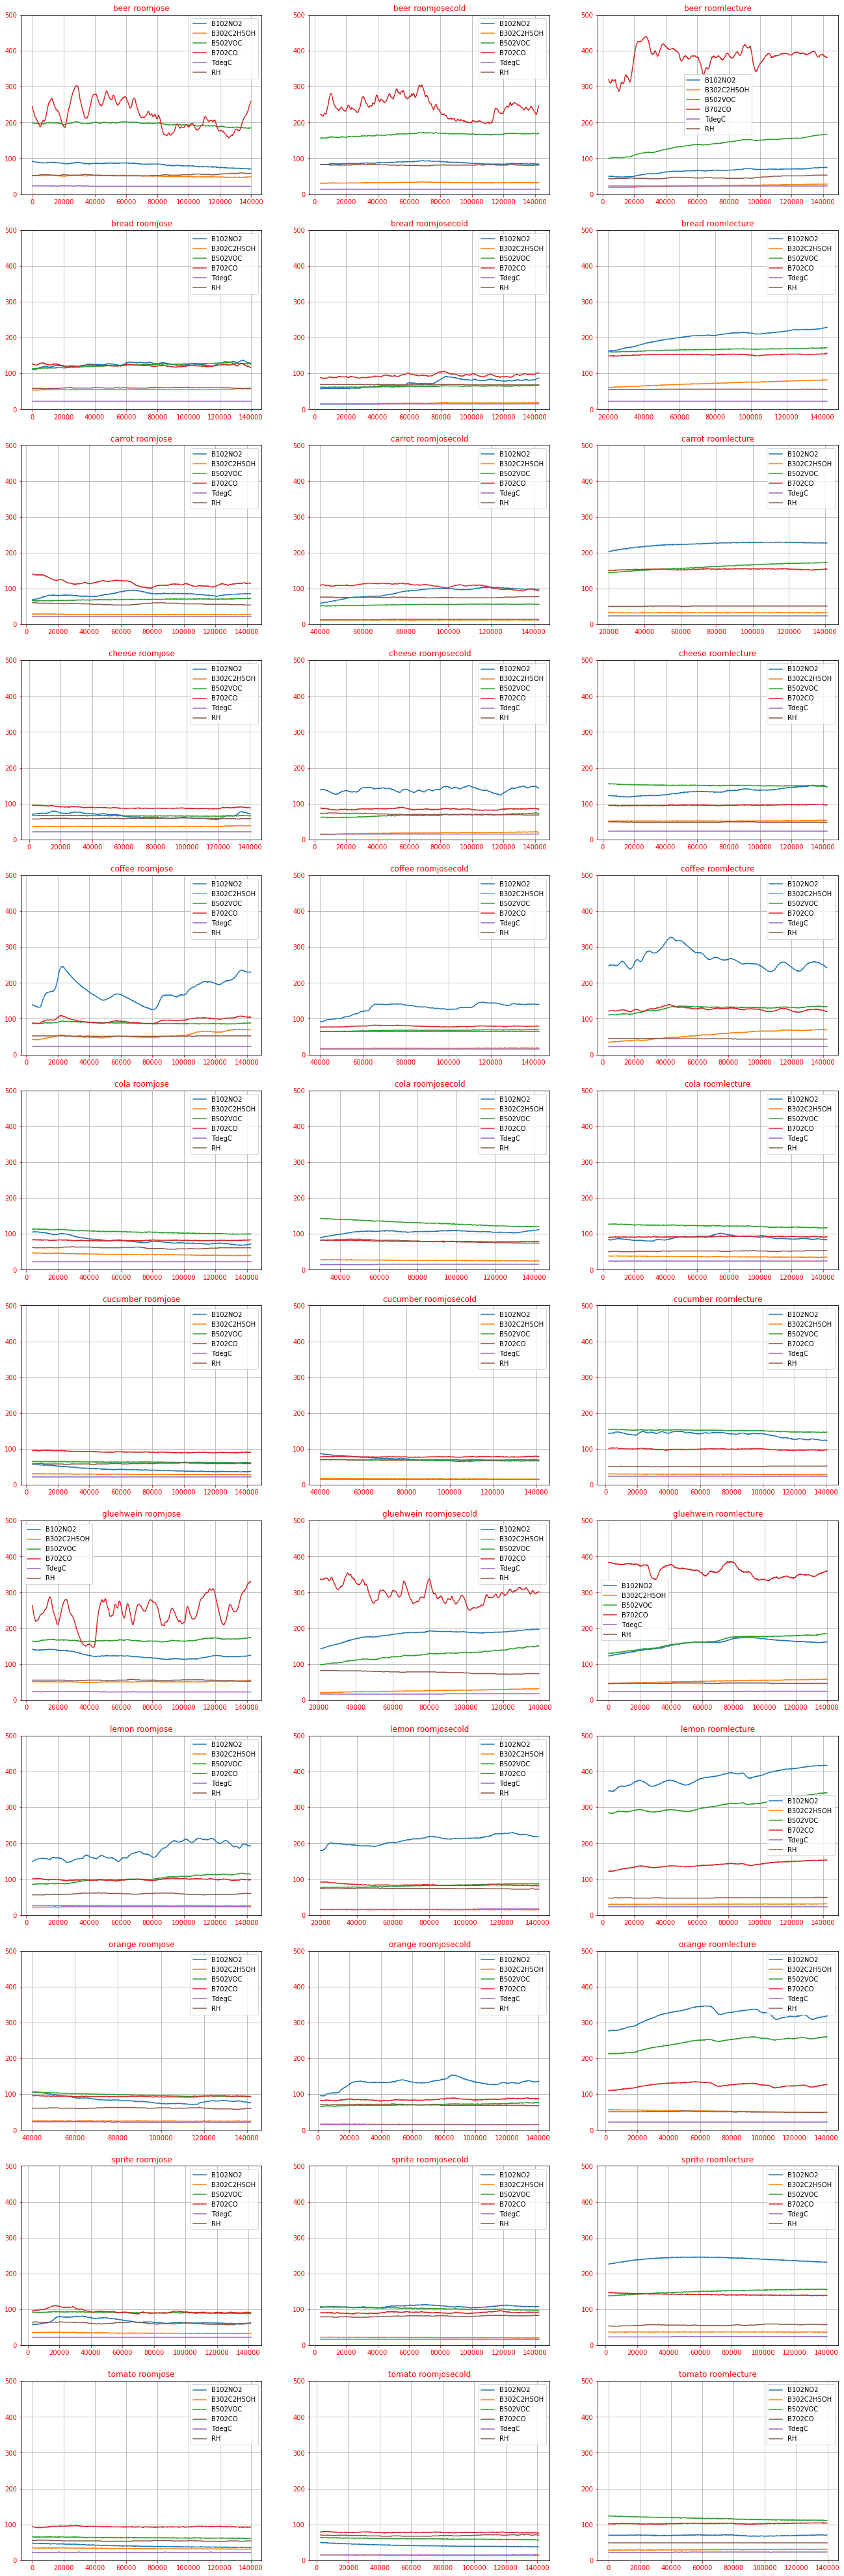

In [9]:


labels = Xdf.label.unique().tolist()
conditions = Xdf.condition.unique().tolist()
figure_scale = 1.5 # <=== parameter to tune
plt.figure(figsize=(figure_scale*15, figure_scale*len(labels)*4))
plot_c = 0

for label_c in labels:
    for condition_c in conditions:
        Xplot = Xdf.loc[
            (Xdf.label==label_c) & (Xdf.condition==condition_c),
            :]
        plot_c += 1
        plt.subplot(len(labels), len(conditions), plot_c)
        plt.plot(Xplot.time_ms, Xplot.iloc[:,1:7])
        plt.legend(Xplot.iloc[:,1:7].columns.to_list())
        plt.title(" ".join([label_c, condition_c]), color="red")
        plt.ylim((0,500))
        plt.tick_params(axis='x', colors='red')
        plt.tick_params(axis='y', colors='red')
        plt.grid()